In [1]:
from matplotlib import pyplot as plt
from matplotlib.colors import ListedColormap
import numpy as np
import pandas as pd

In [2]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))


def loss(y_pred, y):
    return -np.mean(y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred))

In [9]:
class Neuron:
    
    def __init__(self, w=None, b=0):
        self.w = w
        self.b = b
        
        
    def activate(self, x):
        return sigmoid(x)
    
        
    def forward_pass(self, X):
        n = X.shape[0]
        y_pred = np.zeros((n, 1))
        y_pred = self.activate(X @ self.w.reshape(X.shape[1], 1) + self.b)
        return y_pred.reshape(-1, 1)
        
    
    def backward_pass(self, X, y, y_pred, learning_rate=0.1):
        n = len(y)
        y = np.array(y).reshape(-1, 1)
        sigma = self.activate(X @ self.w + self.b)
        self.w = self.w - learning_rate * (X.T @ (sigma - y)) / n
        self.b = self.b - learning_rate * np.mean(sigma - y)
        
    
    def fit(self, X, y, num_epochs=5000):
        self.w = np.zeros((X.shape[1], 1))
        self.b = 0
        loss_values = []
        
        for i in range(num_epochs):
            y_pred = self.forward_pass(X)
            loss_values.append(loss(y_pred, y))
            self.backward_pass(X, y, y_pred)

        return loss_values

In [10]:
w = np.array([1., 2.]).reshape(2, 1)
b = 2.
X = np.array([[1., 3.],
              [2., 4.],
              [-1., -3.2]])

neuron = Neuron(w, b)
y_pred = neuron.forward_pass(X)
print ("y_pred = " + str(y_pred))

y_pred = [[0.99987661]
 [0.99999386]
 [0.00449627]]


In [11]:
y = np.array([1, 0, 1]).reshape(3, 1)
neuron.backward_pass(X, y, y_pred)

print ("w = " + str(neuron.w))
print ("b = " + str(neuron.b))

w = [[0.50077199]
 [0.80246381]]
b = 1.999272210931608


In [12]:
data = pd.read_csv("Яблоки и груши.csv")
X = data.iloc[:,:2].values
y = data['target'].values.reshape((-1, 1))

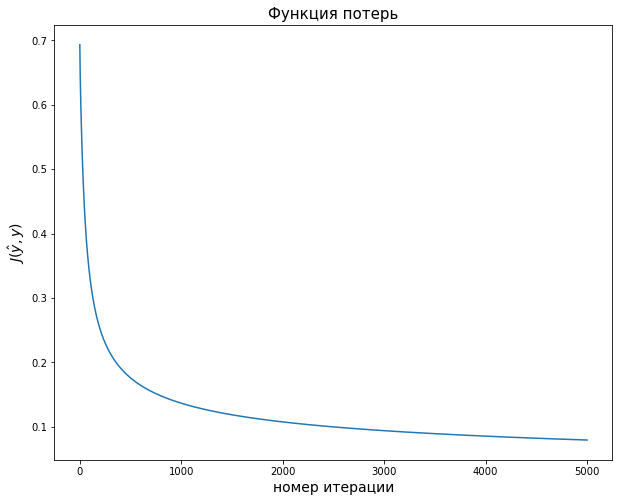

CPU times: total: 875 ms
Wall time: 868 ms


In [13]:
%%time
neuron = Neuron()
J_values = neuron.fit(X, y)

plt.figure(figsize=(10, 8))
plt.plot(J_values)
plt.title('Функция потерь', fontsize=15)
plt.xlabel('номер итерации', fontsize=14)
plt.ylabel('$J(\hat{y}, y)$', fontsize=14)
plt.show()

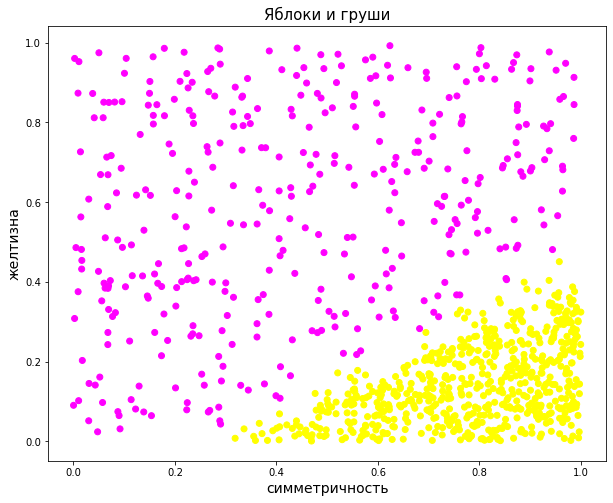

In [14]:
plt.figure(figsize=(10, 8))
plt.scatter(data.iloc[:, 0], data.iloc[:, 1], c=np.array(neuron.forward_pass(X) > 0.5).ravel(), cmap='spring')
plt.title('Яблоки и груши', fontsize=15)
plt.xlabel('симметричность', fontsize=14)
plt.ylabel('желтизна', fontsize=14)
plt.show();